<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-checo0228/blob/main/Emcee_Sergio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sergio Eduardo López Lázaro

Encuentra los parámetros w0 y w1 para el conjunto de datos de los tiempos en carreras de 100 usando cadenas de markov, en particular usando la librería emcee (https://emcee.readthedocs.io/en/stable/tutorials/line/)

Muestra evidencia de que las cadenas han convergido (triangle plots, secuencias de caminadores , criterio de Gelman-Rubin, etc.)

Compara tus resultados con los obtenidos con tu propia implementación del método de metropolis.


In [7]:
pip install emcee

In [2]:
import numpy as np
import emcee
import matplotlib.pyplot as plt

In [3]:
# Cargar los datos desde el archivo
data = np.loadtxt('olympic100m_men.txt', delimiter=',', skiprows=1)
x = data[:, 0]  # Año
y = data[:, 1]  # Tiempo en segundos

In [4]:
# Modelo de regresión lineal
def model(x, w0, w1):
    return w0 + w1 * x

# Likelihood: logaritmo de la función de probabilidad
def ln_likelihood(params, x, y):
    w0, w1, sigma = params
    model_y = model(x, w0, w1)
    residuals = y - model_y
    return -0.5 * np.sum(residuals**2 / sigma**2 + np.log(2 * np.pi * sigma**2))

# Prior: logaritmo del prior
def ln_prior(params):
    w0, w1, sigma = params
    if 10.0 < w0 < 20.0 and -1.0 < w1 < 0.0 and 0.1 < sigma < 1.0:
        return 0.0  # Prior uniforme dentro de los límites
    return -np.inf  # Fuera de los límites, prior igual a cero

# Posterior: logaritmo del posterior
def ln_posterior(params, x, y):
    prior = ln_prior(params)
    if not np.isfinite(prior):
        return -np.inf
    return prior + ln_likelihood(params, x, y)


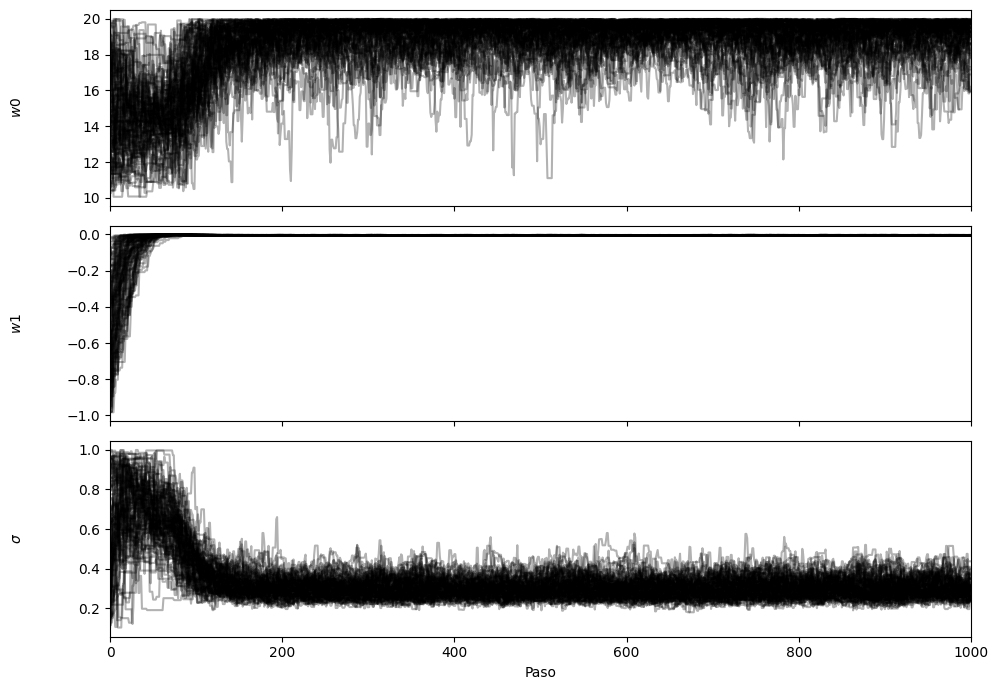

In [5]:
# Número de cadenas y pasos
nwalkers = 100
nsteps = 1000

# Valor inicial de las cadenas
w0_init = np.random.uniform(10.0, 20.0, nwalkers)
w1_init = np.random.uniform(-1.0, 0.0, nwalkers)
sigma_init = np.random.uniform(0.1, 1.0, nwalkers)

# Combinar los valores iniciales en un array de parámetros
initial_params = np.column_stack((w0_init, w1_init, sigma_init))

# Configuración de emcee
ndim = 3  # Número de dimensiones
sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=(x, y))

# Ejecutar las cadenas de Markov
sampler.run_mcmc(initial_params, nsteps)

# Obtener los valores muestreados
samples = sampler.get_chain()

# Graficar resultados
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples_flat = samples.reshape(-1, ndim)
labels = [r'$w0$', r'$w1$', r'$\sigma$']

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, nsteps)
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("Paso")
plt.tight_layout()
plt.show()

Triangle Plot

In [8]:
pip install corner


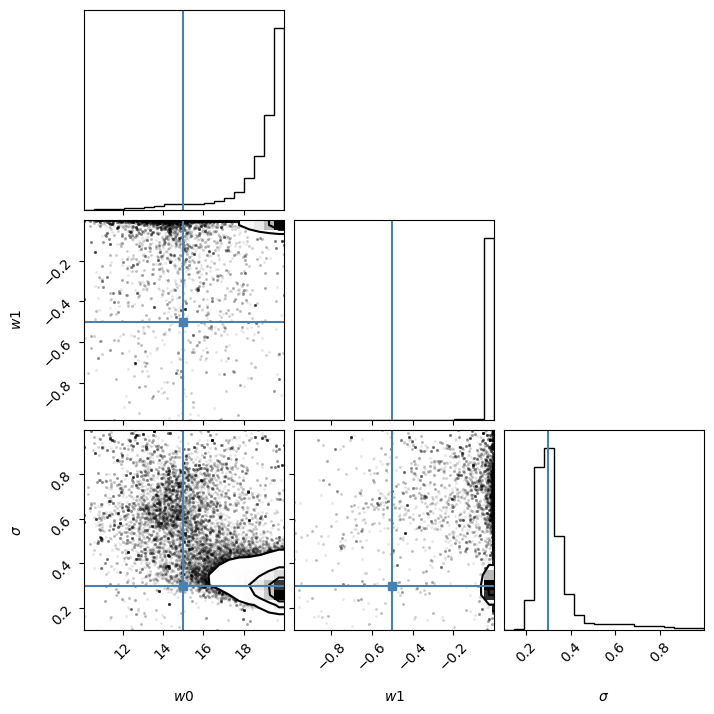

In [9]:
import corner

samples_flat = samples.reshape(-1, ndim)
corner.corner(samples_flat, labels=labels, truths=[15, -0.5, 0.3])
plt.show()


Secuencias de Caminantes

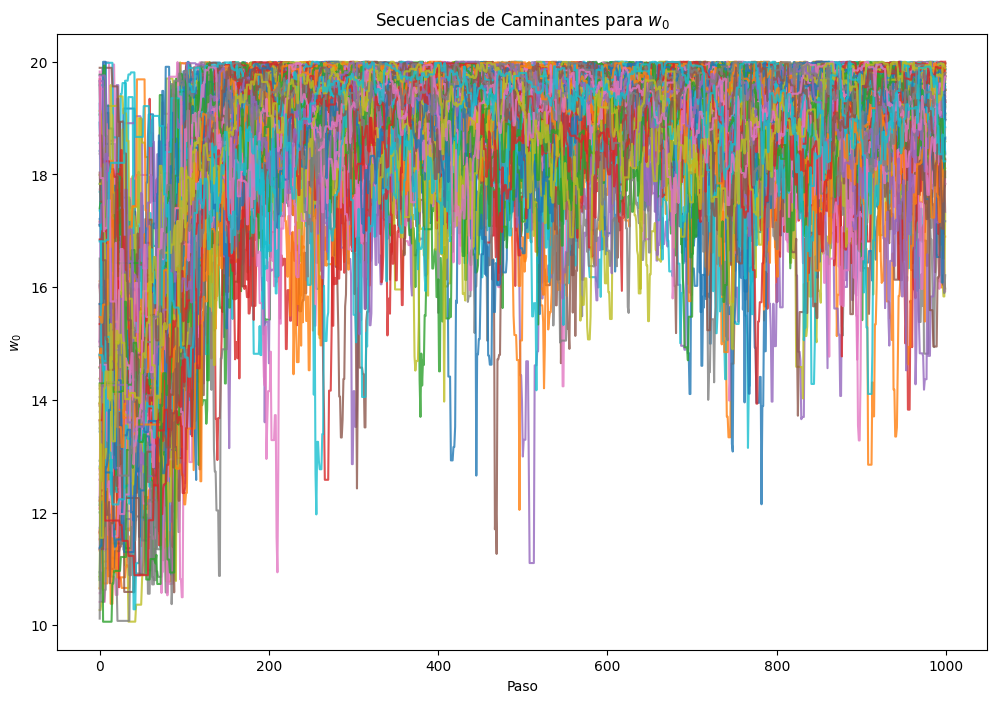

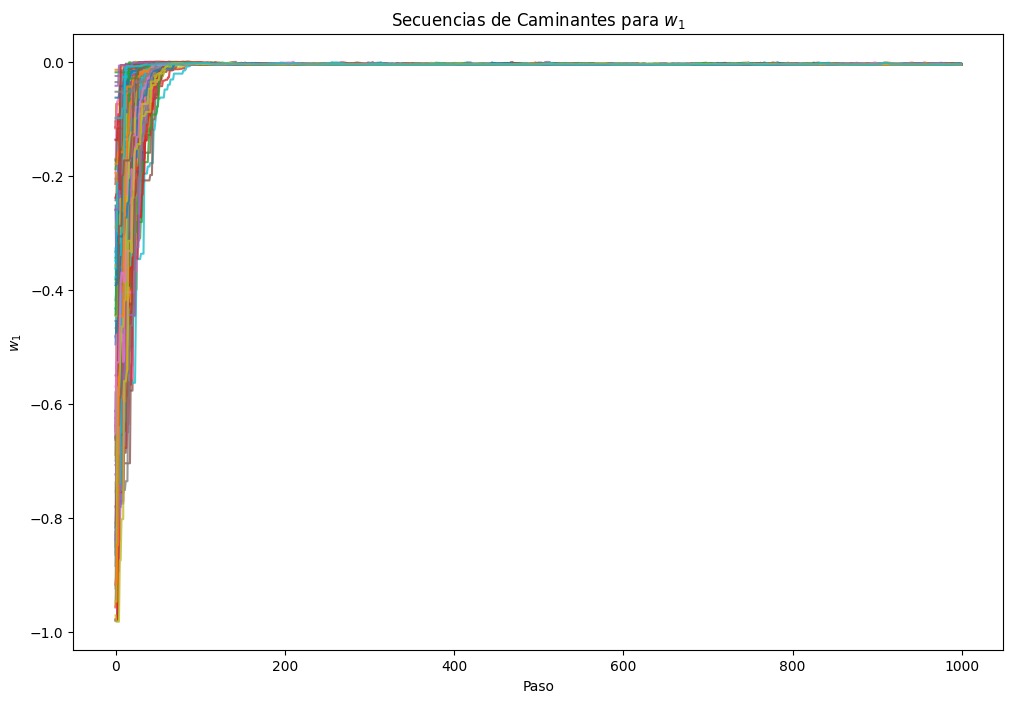

In [10]:
plt.figure(figsize=(12, 8))
for i in range(nwalkers):
    plt.plot(sampler.chain[i, :, 0], alpha=0.8)
plt.xlabel("Paso")
plt.ylabel(r"$w_0$")
plt.title("Secuencias de Caminantes para $w_0$")
plt.show()

plt.figure(figsize=(12, 8))
for i in range(nwalkers):
    plt.plot(sampler.chain[i, :, 1], alpha=0.8)
plt.xlabel("Paso")
plt.ylabel(r"$w_1$")
plt.title("Secuencias de Caminantes para $w_1$")
plt.show()
